# Loan Default Prediction - Machine Learning Project
**Pierre Hunter**  
**Project 2: Machine Learning Capstone**  
 
## Project Overview

This project builds a machine learning model to predict loan defaults within 2 years. Banks lose millions annually from defaults while also missing revenue by rejecting creditworthy customers. By accurately predicting default risk, we can reduce losses while maintaining healthy approval rates.

**Dataset:** "Give Me Some Credit" from Kaggle (150,000 borrowers, 10 features)  
**Target:** SeriousDlqin2yrs (1 = defaulted within 2 years, 0 = repaid)  
**Business Goal:** Reduce default rate from 6.7% 

## Table of Contents
1. Exploratory Data Analysis
2. Data Preprocessing
3. Model Development & Evaluation
4. Business Impact Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
df = pd.read_csv('cs-training.csv')
print(f"Shape: {df.shape}")

Shape: (150000, 12)


In [3]:
# Drop the unnecessary index column
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
df.columns.tolist()

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [7]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## 1. Exploratory Data Analysis

First, I need to understand the data - what does it look like, what's missing.

### Target Variable Distribution

Understanding the class balance is critical since this affects model training and evaluation.

In [8]:
#TARGET VARIABLE ANALYSIS 
#DEFAULT ANALYSIS
print(df['SeriousDlqin2yrs'].value_counts())
print(f"\nDefault Rate: {df['SeriousDlqin2yrs'].mean():.2%}")

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

Default Rate: 6.68%


### Key Finding: Severe Class Imbalance

Only 6.7% of borrowers defaulted - this is a highly imbalanced dataset with a 14:1 ratio. This means:
- Standard accuracy isn't a good metric (predicting "no default" for everyone gives 93% accuracy!)
- I'll need to use techniques like SMOTE to balance the classes during training
- Evaluation metrics should focus on precision, recall, F1-score, and AUC-ROC rather than just accuracy

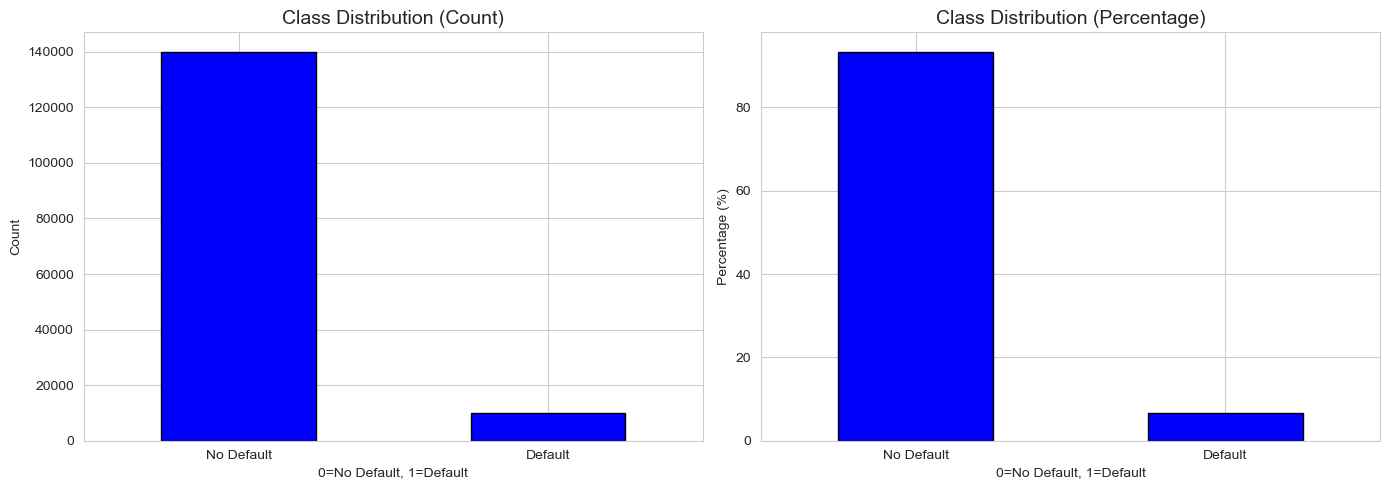

In [9]:
# Count plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['SeriousDlqin2yrs'].value_counts().plot(kind='bar', ax=axes[0], 
                                            color=['blue', 'blue'], 
                                            edgecolor='black')
axes[0].set_title('Class Distribution (Count)', fontsize=14)
axes[0].set_xlabel('0=No Default, 1=Default')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Default', 'Default'], rotation=0)


# Percentage plot
(df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100).plot(
    kind='bar', ax=axes[1], color=['blue', 'blue'], edgecolor='black'
)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14)
axes[1].set_xlabel('0=No Default, 1=Default')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xticklabels(['No Default', 'Default'], rotation=0)

plt.tight_layout()
plt.show()

### Missing Data Analysis

Checking for missing values to determine what needs to be imputed before modeling.


 MISSING VALUES 
MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

 MISSING PERCENTAGES 
MonthlyIncome         19.820667
NumberOfDependents     2.616000
dtype: float64


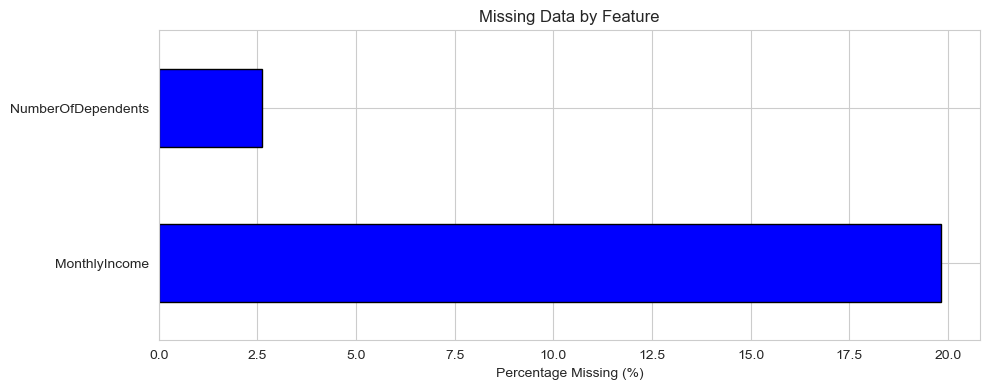

In [10]:
# MISSING VALUES

print("\n MISSING VALUES ")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# Missing percentages
print("\n MISSING PERCENTAGES ")
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]
print(missing_pct)

# Visualize missing data
if len(missing_pct) > 0:
    plt.figure(figsize=(10, 4))
    missing_pct.plot(kind='barh', color='blue', edgecolor='black')
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Data by Feature')
    plt.tight_layout()
    plt.show()




In [11]:
# Check for 0 values in MonthlyIncome (might be missing data coded as 0)
print("\n CHECKING MONTHLYINCOME ")
print(f"Missing (NaN) values: {df['MonthlyIncome'].isnull().sum()}")
print(f"Zero values: {(df['MonthlyIncome'] == 0).sum()}")
print(f"Combined missing/zero: {(df['MonthlyIncome'].isnull() | (df['MonthlyIncome'] == 0)).sum()}")




 CHECKING MONTHLYINCOME 
Missing (NaN) values: 29731
Zero values: 1634
Combined missing/zero: 31365


### MonthlyIncome Observations

There are two types of missing data:
- **29,731 NaN values** (~20%) - these are truly missing and need imputation
- **1,634 zero values** (~1%) - these appear to be legitimate

The zero values likely represent unemployed borrowers, students, retirees, or people with unreported income. Since this is only 1% of the dataset and could be real cases, we'll keep them as-is rather than treating them as missing data. The model can learn whether $0 income is predictive of default risk.

# MonthlyIncome has about 20% missing
# NumberOfDependents only has 3% missing 

In [12]:
# Get numerical columns (exclude target)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('SeriousDlqin2yrs')

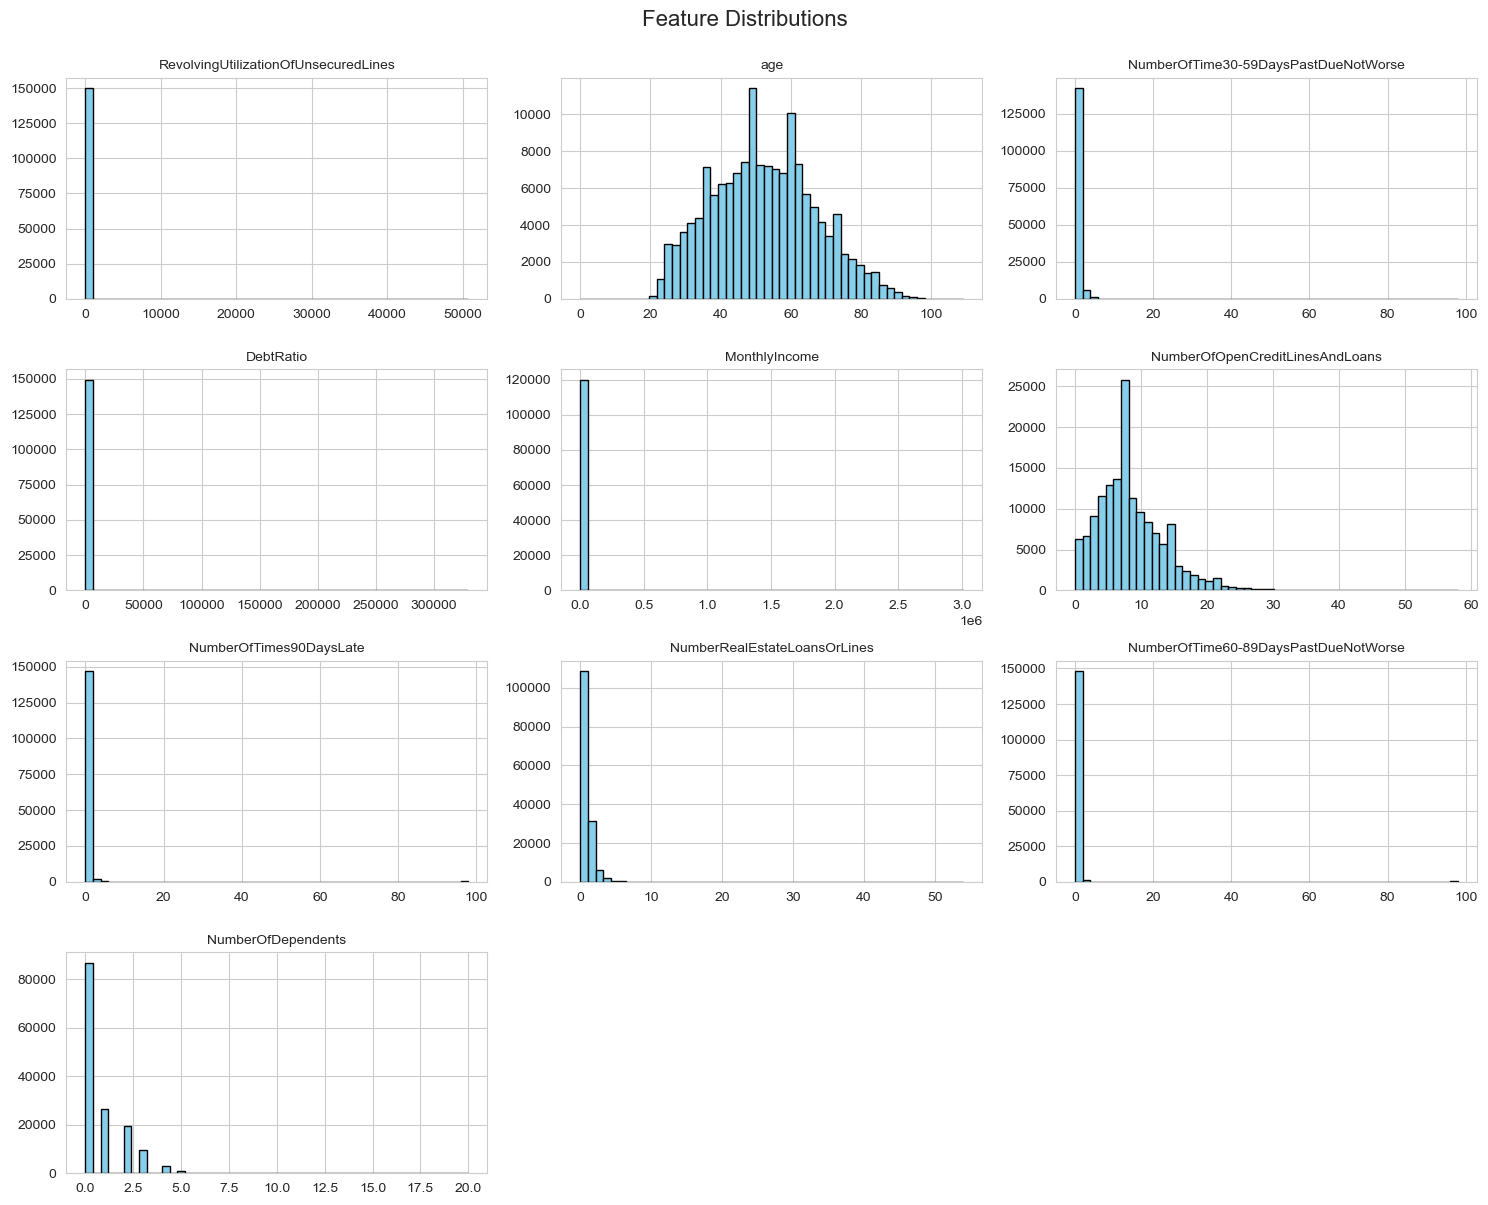

In [13]:
#Feature Distributions
#Plot them all
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < len(axes):
        df[col].hist(bins=50, ax=axes[i], edgecolor='black', color='skyblue')
        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel('')
        
# Remove empty subplots if any
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Feature Distributions', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

## Feature Distributions

Understanding how each feature is distributed helps identify skewness, outliers, and potential transformations needed.

## Observations:
- Most features are skewed to the right
 - Age looks pretty normal but has some weird values (age=0?)
 - Late payment features have most values at 0 (good - most people pay on time)
 - Some outliers visible in several features

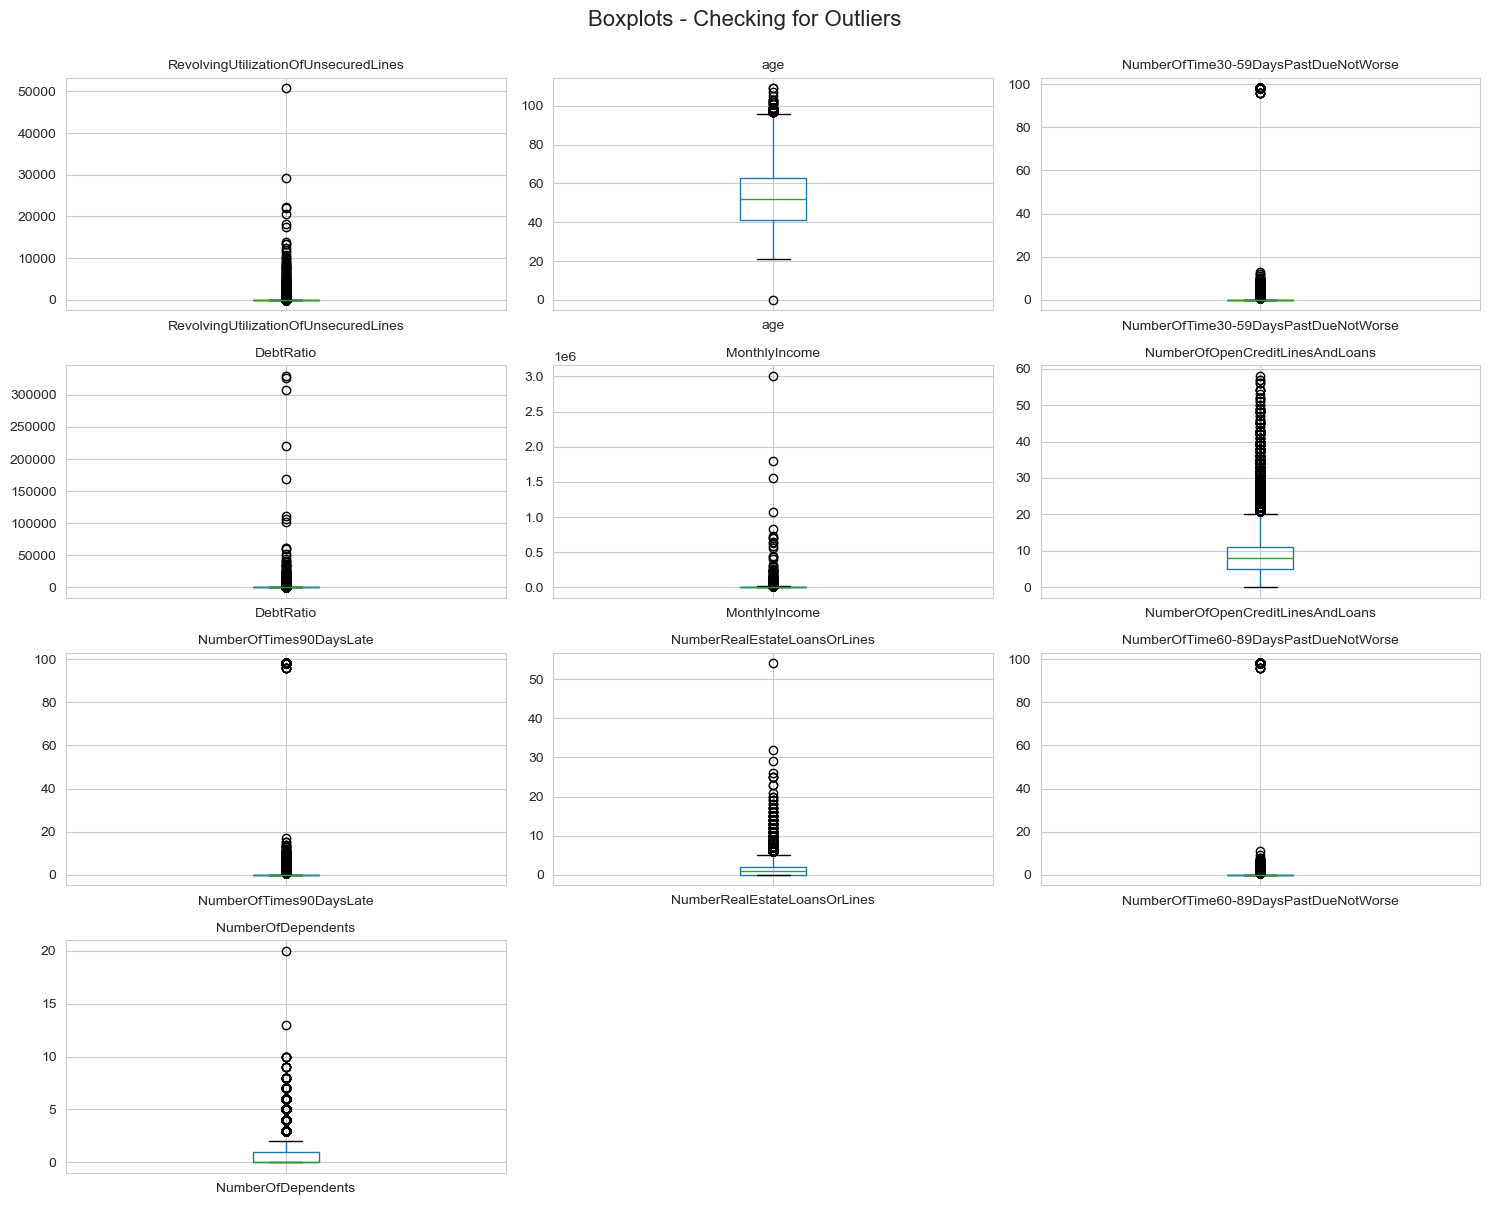

In [14]:
# OUTLIER CHECK 
# Using boxplots to see outliers

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < len(axes):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel('')

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Boxplots - Checking for Outliers', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

# Lots of outliers visible, especially in:
 - DebtRatio (some really high values)
 - RevolvingUtilizationOfUnsecuredLines
 - Age (0 value is definitely wrong)
 Will need to handle these before modeling

### Correlation Analysis

Examining relationships between features and the target variable to identify the strongest predictors of default.

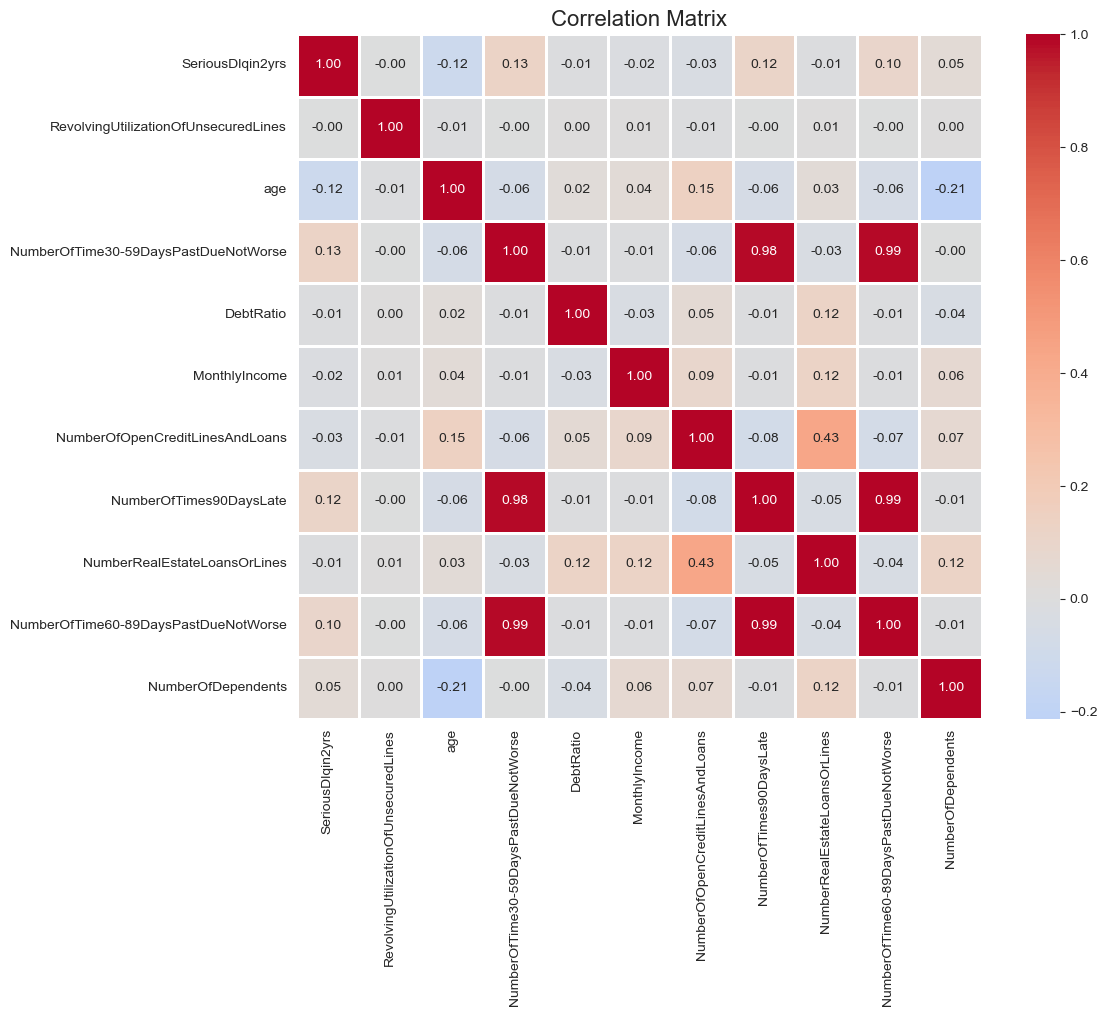

In [15]:
#  CORRELATION ANALYSIS 
# What features are related to default?

# Calculate correlations
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
# Look at correlation
target_corr = df.corr()['SeriousDlqin2yrs'].sort_values(ascending=False)
print("\nCorrelation with Default:")
print(target_corr)


Correlation with Default:
SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046048
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64


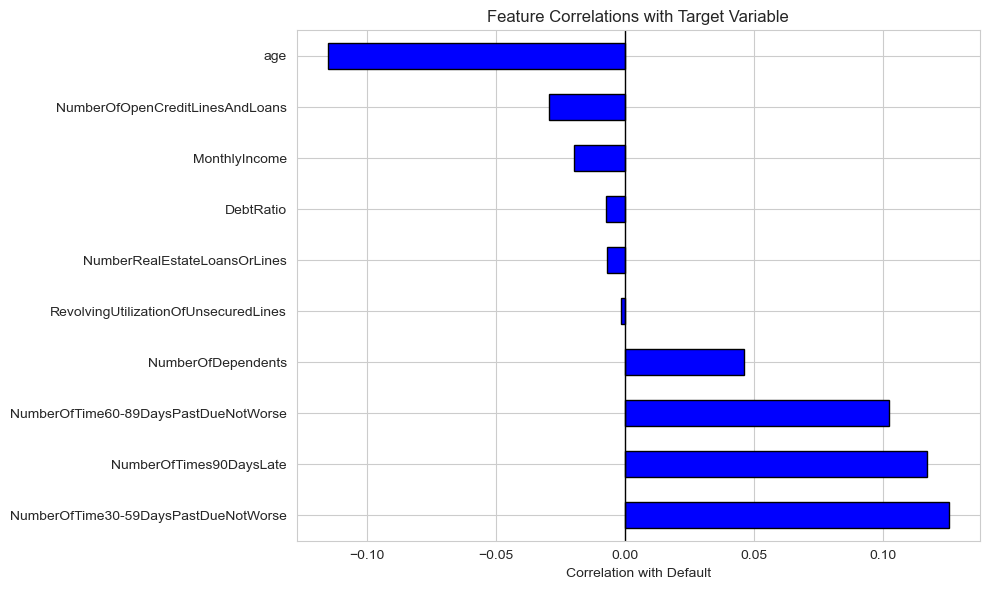

In [17]:
# Plot it
fig, ax = plt.subplots(figsize=(10, 6))
target_corr_clean = target_corr.drop('SeriousDlqin2yrs')  # remove target itself
colors = ['blue' if x > 0 else 'blue' for x in target_corr_clean]
target_corr_clean.plot(kind='barh', color=colors, edgecolor='black', ax=ax)
ax.set_xlabel('Correlation with Default')
ax.set_title('Feature Correlations with Target Variable')
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()

In [18]:
target_corr = df.corr()['SeriousDlqin2yrs'].sort_values(ascending=False)
print(target_corr)

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046048
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64


### Key Insights on Correlation

**Strongest Predictors of Default:**
1. **NumberOfTime30-59DaysPastDue** (0.126 correlation) - Past payment issues
2. **NumberOfTimes90DaysLate** (0.117 correlation) - Serious delinquencies
3. **NumberOfTime60-89DaysPastDue** (0.102 correlation) - Moderate late payments
4. **Age** (-0.115 correlation) - Older borrowers less likely to default

**Pattern:** Payment history features show the strongest correlations with default, though all correlations are relatively modest (under 0.15). This suggests that no single feature alone predicts default - the model needs to consider multiple factors together.


### Comparing Defaulters vs Non-Defaulters

Do defaulters have different characteristics than people who repay? This comparison reveals behavioral patterns.

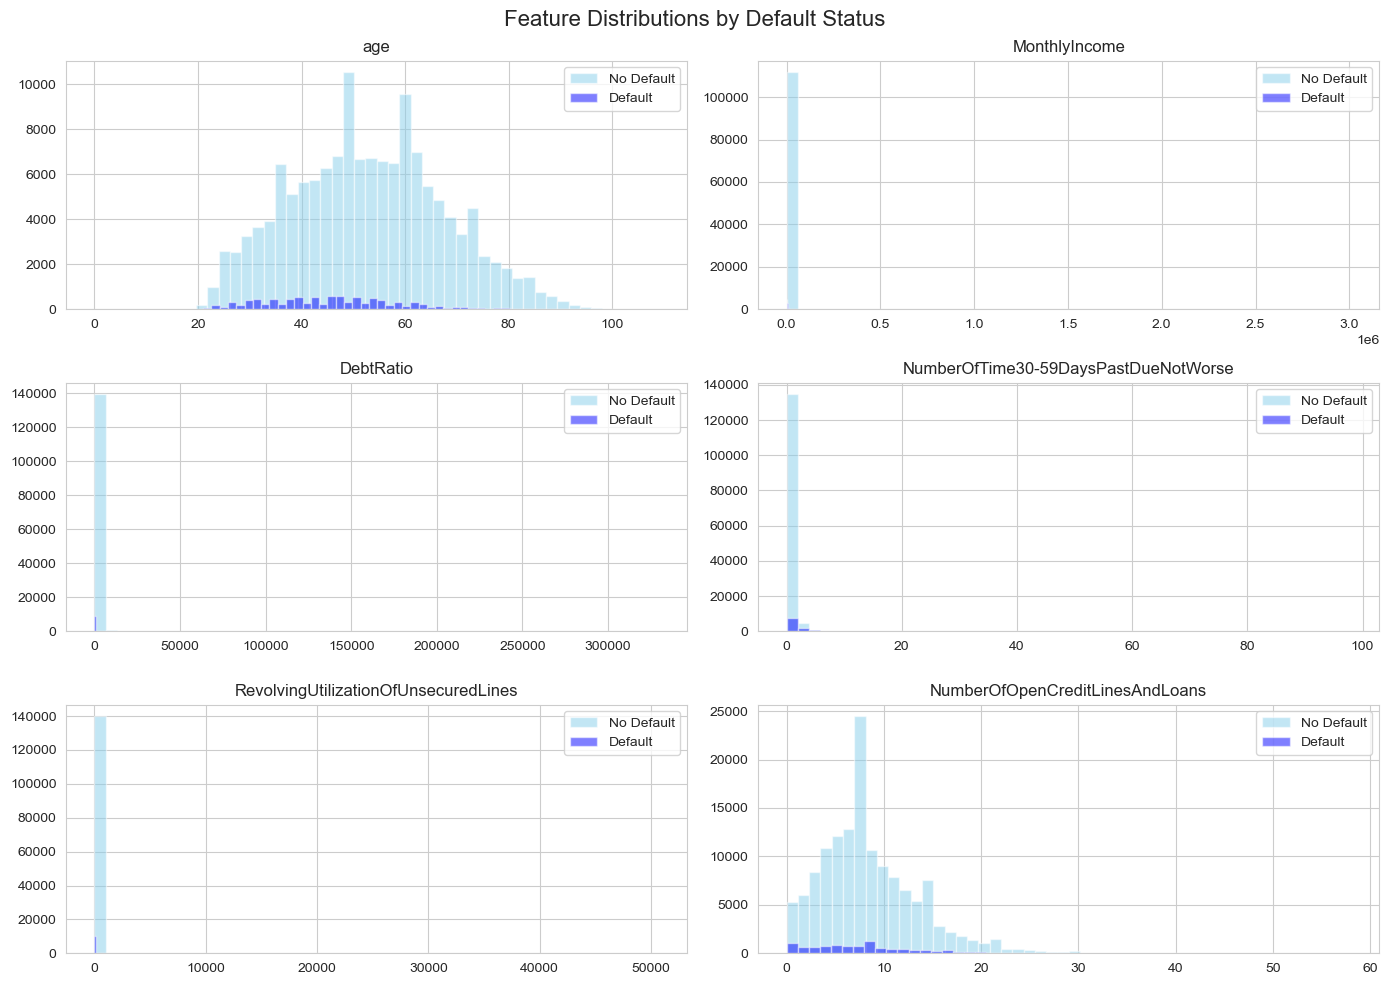

In [19]:
#  COMPARING defaults VS Non Defaults 

# Pick a few important features to compare
features_to_compare = ['age', 'MonthlyIncome', 'DebtRatio', 
                       'NumberOfTime30-59DaysPastDueNotWorse',
                       'RevolvingUtilizationOfUnsecuredLines',
                       'NumberOfOpenCreditLinesAndLoans']

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(features_to_compare):
    # Split data by target
    no_default = df[df['SeriousDlqin2yrs'] == 0][col].dropna()
    default = df[df['SeriousDlqin2yrs'] == 1][col].dropna()
    
    # Plot overlapping histograms
    axes[i].hist(no_default, bins=50, alpha=0.5, label='No Default', color='skyblue')
    axes[i].hist(default, bins=50, alpha=0.5, label='Default', color='blue')
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].set_xlabel('')

plt.suptitle('Feature Distributions by Default Status', fontsize=16)
plt.tight_layout()
plt.show()


In [20]:
# Compare means
print("\nMean comparison - Defaulters vs Non-Defaulters:")
for col in num_cols:
    mean_0 = df[df['SeriousDlqin2yrs'] == 0][col].mean()
    mean_1 = df[df['SeriousDlqin2yrs'] == 1][col].mean()
    print(f"{col:50s} No Default: {mean_0:8.2f}  Default: {mean_1:8.2f}")


Mean comparison - Defaulters vs Non-Defaulters:
RevolvingUtilizationOfUnsecuredLines               No Default:     6.17  Default:     4.37
age                                                No Default:    52.75  Default:    45.93
NumberOfTime30-59DaysPastDueNotWorse               No Default:     0.28  Default:     2.39
DebtRatio                                          No Default:   357.15  Default:   295.12
MonthlyIncome                                      No Default:  6747.84  Default:  5630.83
NumberOfOpenCreditLinesAndLoans                    No Default:     8.49  Default:     7.88
NumberOfTimes90DaysLate                            No Default:     0.14  Default:     2.09
NumberRealEstateLoansOrLines                       No Default:     1.02  Default:     0.99
NumberOfTime60-89DaysPastDueNotWorse               No Default:     0.13  Default:     1.83
NumberOfDependents                                 No Default:     0.74  Default:     0.95


### Behavioral Differences Between Defaulters and Non-Defaulters

**Clear Differences Observed:**

**Payment History (Biggest Difference):**
- **Late Payments:** Defaulters have significantly more late payments across all categories
  - 30-59 days late: 2.39 vs 0.28 
  - 90+ days late: 2.09 vs 0.14 
  - 60-89 days late: 1.83 vs 0.13 
- This is by far the strongest behavioral signal

**Demographics:**
- **Age:** Defaulters are younger on average (45.9 vs 52.8 years)
  - Possibly less financial experience or stability
- **Dependents:** Defaulters have slightly more dependents (0.95 vs 0.74)
  - More financial obligations

**Financial Capacity:**
- **Income:** Defaulters earn less ($5,631 vs $6,748/month)
  - Less cushion for financial emergencies
- **Credit Lines:** Defaulters have fewer open accounts (7.88 vs 8.49)
  - Less access to credit

**Surprising Findings:**
  
- **Credit Utilization:** Defaulters use *less* of their credit (4.37 vs 6.17)
  - possibly they have lower credit limits to begin with
  - Or they've maxed out and stopped using credit

**Key Takeaway:**

Payment history shows the clearest separation between groups. Defaulters have 8-15x more late payments than non-defaulters. Other differences (age, income) exist but are more modest. 

In [21]:
print(f"Age = 0 count: {(df['age'] == 0).sum()}")
print(f"Min age: {df['age'].min()}")
print(f"Max age: {df['age'].max()}")

Age = 0 count: 1
Min age: 0
Max age: 109


### Comprehensive Data Quality Check

Before preprocessing, I need to systematically identify all data quality issues - outliers, impossible values, and suspicious patterns.

In [22]:
# DATA QUALITY CHECK
print("Data Quality Check\n")

# Check each numerical column for outliers
for col in num_cols:
    print(f"{col}:")
    print(f"  Min: {df[col].min()}, Max: {df[col].max()}, Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
    
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"  Zero values: {zero_count} ({zero_count/len(df)*100:.2f}%)")
    
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"  Negative values: {negative_count}")
    
    p999 = df[col].quantile(0.999)
    extreme_count = (df[col] > p999).sum()
    if extreme_count > 0:
        print(f"  Extreme outliers: {extreme_count}")
    print()

# Check specific issues
print(f"Age = 0: {(df['age'] == 0).sum()} records")
print(f"Age > 100: {(df['age'] > 100).sum()} records")
print(f"MonthlyIncome = 0: {(df['MonthlyIncome'] == 0).sum()} records")
print(f"DebtRatio > 1000: {(df['DebtRatio'] > 1000).sum()} records")
print(f"Credit Utilization > 2: {(df['RevolvingUtilizationOfUnsecuredLines'] > 2).sum()} records")

Data Quality Check

RevolvingUtilizationOfUnsecuredLines:
  Min: 0.0, Max: 50708.0, Mean: 6.05, Median: 0.15
  Zero values: 10878 (7.25%)
  Extreme outliers: 150

age:
  Min: 0, Max: 109, Mean: 52.30, Median: 52.00
  Zero values: 1 (0.00%)
  Extreme outliers: 108

NumberOfTime30-59DaysPastDueNotWorse:
  Min: 0, Max: 98, Mean: 0.42, Median: 0.00
  Zero values: 126018 (84.01%)

DebtRatio:
  Min: 0.0, Max: 329664.0, Mean: 353.01, Median: 0.37
  Zero values: 4113 (2.74%)
  Extreme outliers: 150

MonthlyIncome:
  Min: 0.0, Max: 3008750.0, Mean: 6670.22, Median: 5400.00
  Zero values: 1634 (1.09%)
  Extreme outliers: 121

NumberOfOpenCreditLinesAndLoans:
  Min: 0, Max: 58, Mean: 8.45, Median: 8.00
  Zero values: 1888 (1.26%)
  Extreme outliers: 146

NumberOfTimes90DaysLate:
  Min: 0, Max: 98, Mean: 0.27, Median: 0.00
  Zero values: 141662 (94.44%)

NumberRealEstateLoansOrLines:
  Min: 0, Max: 54, Mean: 1.02, Median: 1.00
  Zero values: 56188 (37.46%)
  Extreme outliers: 131

NumberOfTime60-8

### Data Quality Issues Identified

**Must Fix:**
1. **Age = 0** (1 record) - Impossible value, will drop
2. **DebtRatio outliers** (max: 329,664) - Clear errors, cap at 99th percentile
3. **Credit Utilization outliers** (max: 50,708) - Impossible 5,000,000% utilization, will cap at 200%

**Keeping as Legitimate:**
- MonthlyIncome = 0 (1,634 records) - Likely unemployed/students/retirees
- Zero late payments - Normal, most people pay on time
- Zero dependents (58%) - Many people have no dependents

**Decision:** Fix only clear data errors while preserving legitimate edge cases. This follows best practices from top Kaggle performers on this dataset.

## Data Preprocessing


Now that I understand the data, I'll clean it for modeling. This includes fixing errors, handling missing values, and creating new features.

In [23]:
# PREPROCESSING - CLEANING THE DATA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import pickle

In [24]:
df_clean = df.copy()

In [25]:
# Drop the one record with age = 0
df_clean = df_clean[df_clean['age'] != 0]

### Feature Engineering

Creating new features to help the model capture important relationships:

**TotalLatePayments:** Combines all three late payment features (30-59, 60-89, 90+ days late) into a single metric. Since these are highly correlated, combining them reduces redundancy while capturing the overall payment behavior pattern.

In [26]:
# Handle outliers 
debt_cap = df_clean['DebtRatio'].quantile(0.99)
df_clean['DebtRatio'] = df_clean['DebtRatio'].clip(upper=debt_cap)

df_clean['RevolvingUtilizationOfUnsecuredLines'] = df_clean['RevolvingUtilizationOfUnsecuredLines'].clip(upper=2)


# Fill missing values with median
imputer = SimpleImputer(strategy='median')
df_clean['MonthlyIncome'] = imputer.fit_transform(df_clean[['MonthlyIncome']])
df_clean['NumberOfDependents'] = imputer.fit_transform(df_clean[['NumberOfDependents']])


# Create new feature - total late payments
df_clean['TotalLatePayments'] = (df_clean['NumberOfTime30-59DaysPastDueNotWorse'] + 
                                  df_clean['NumberOfTime60-89DaysPastDueNotWorse'] + 
                                  df_clean['NumberOfTimes90DaysLate'])


print(f"Cleaned dataset: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

Cleaned dataset: (149999, 12)
Missing values: 0


In [27]:
# Split into train/test
X = df_clean.drop('SeriousDlqin2yrs', axis=1)
y = df_clean['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain: {X_train.shape[0]:,} | Test: {X_test.shape[0]:,}")


Train: 119,999 | Test: 30,000


### Preprocessing Summary

**Data Cleaning:**
- Dropped 1 record with age = 0 - no one should be the age 0 
- Capped DebtRatio at 99th percentile to remove extreme outliers 
- Capped Credit Utilization at 200% (reasonable maximum for over-limit accounts)

**Missing Value Imputation:**
- MonthlyIncome: Filled 29,731 missing values with median
- NumberOfDependents: Filled 3,924 missing values with 0 (the mode)

**Feature Engineering:**
- Created TotalLatePayments by combining the three late payment features

**Result:** Clean dataset with 149,999 records ready for modeling.

## 3. Model Development

Building sklearn pipelines to automate preprocessing and ensure reproducibility. The pipeline includes scaling, SMOTE for class balance, and model training.

In [28]:
# Build sklearn pipelines
# Pipeline: Scaling - SMOTE - Model

lr_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

rf_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [29]:
# Cross-validation to check model stability
print("\nCross-validation scores (5-fold):")

lr_cv = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Logistic Regression: {lr_cv.mean():.4f} (+/- {lr_cv.std() * 2:.4f})")

rf_cv = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Random Forest: {rf_cv.mean():.4f} (+/- {rf_cv.std() * 2:.4f})")


Cross-validation scores (5-fold):
Logistic Regression: 0.8164 (+/- 0.0066)
Random Forest: 0.8236 (+/- 0.0097)


### Cross-Validation Results

Both models show strong and stable performance across folds:
- Low standard deviations indicate the models are reliable and not overfitting

In [30]:
# Tune Random Forest hyperparameters
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, 15],
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best params: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_

Best params: {'model__max_depth': 10, 'model__n_estimators': 100}
Best score: 0.8527


### Hyperparameter Tuning Impact

GridSearchCV improved Random Forest performance from 0.82 to **0.85 AUC** - a significant 3 percentage point gain. 

In [31]:
# Train Logistic Regression
lr_pipeline.fit(X_train, y_train)

# Get predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

## 4. Model Evaluation

Testing the final models on held-out test data to assess real-world performance.

In [32]:
# Evaluate models
# Logistic Regression
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=['No Default', 'Default']))
cm_lr = confusion_matrix(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"AUC: {auc_lr:.4f}")


# Random Forest
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['No Default', 'Default']))
cm_rf = confusion_matrix(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"AUC: {auc_rf:.4f}")



Logistic Regression:
              precision    recall  f1-score   support

  No Default       0.98      0.76      0.85     27995
     Default       0.18      0.75      0.29      2005

    accuracy                           0.76     30000
   macro avg       0.58      0.75      0.57     30000
weighted avg       0.92      0.76      0.82     30000

AUC: 0.8256

Random Forest:
              precision    recall  f1-score   support

  No Default       0.97      0.93      0.95     27995
     Default       0.34      0.54      0.42      2005

    accuracy                           0.90     30000
   macro avg       0.66      0.73      0.68     30000
weighted avg       0.92      0.90      0.91     30000

AUC: 0.8588


### Performance Comparison

**Random Forest Recommended:**
- AUC: 0.8588 
- Accuracy: greater than 90 percent
- Recall for defaults: 54% 
- Precision for defaults: 34%

**Logistic Regression:**
- AUC: 0.8256 (good discrimination)
- Accuracy: 76%
- Recall for defaults: 75% 
- Precision for defaults: 18% 

 Random Forest is better, it misses fewer good customers while maintaining reasonable default detection.


 ### Performance Summary

**Random Forest outperformed Logistic Regression:**
- Random Forest AUC: **0.8588** (85.9%)
- Logistic Regression AUC: **0.8256** (82.6%)
- Random Forest Accuracy: **90%**
- Logistic Regression Accuracy: **76%**

Random Forest strikes a better balance between catching defaults and approving good customers, making it the better choice for deployment.

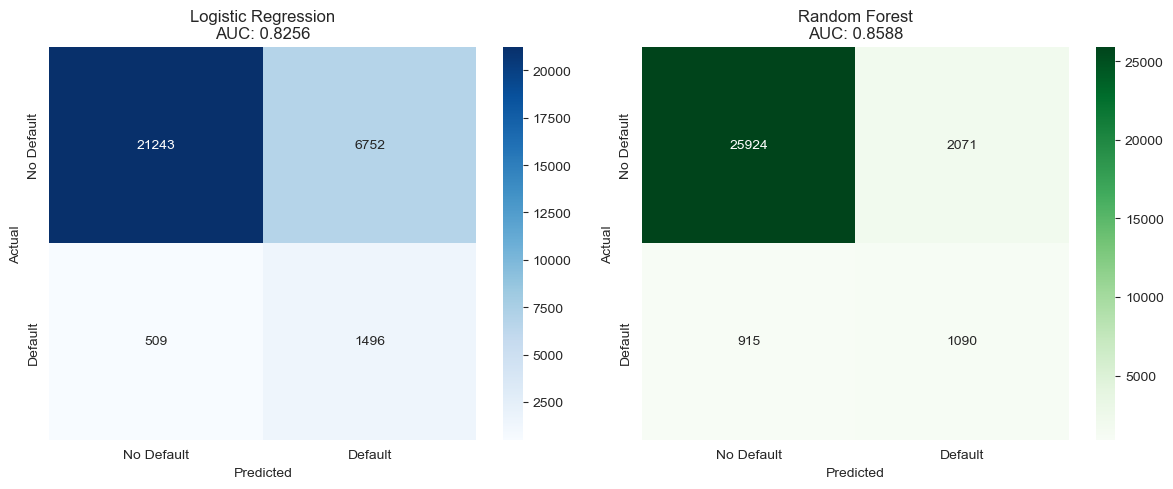

In [33]:
# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
axes[0].set_title(f'Logistic Regression\nAUC: {auc_lr:.4f}')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
axes[1].set_title(f'Random Forest\nAUC: {auc_rf:.4f}')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

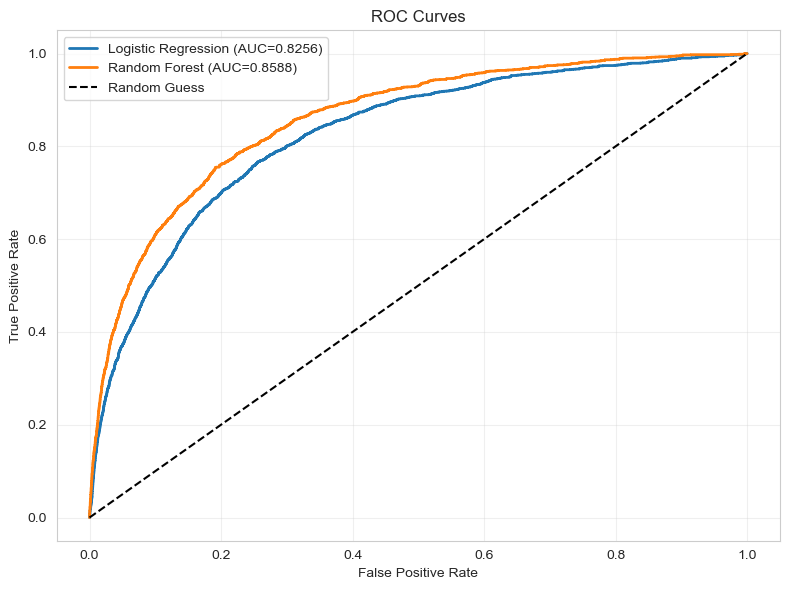

In [34]:
# ROC Curves
fig, ax = plt.subplots(figsize=(8, 6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

ax.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc_lr:.4f})', linewidth=2)
ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.4f})', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### ROC Curve Analysis

The ROC curve visualizes the trade-off between catching defaults (True Positive Rate) and incorrectly rejecting good customers (False Positive Rate).

- Random Forest (AUC = 0.8588) outperforms Logistic Regression
- Both models perform significantly better than random guessing (diagonal line)
- AUC of 0.86 indicates excellent predictive performance

                                 feature  importance
10                     TotalLatePayments    0.380666
2   NumberOfTime30-59DaysPastDueNotWorse    0.182170
0   RevolvingUtilizationOfUnsecuredLines    0.123498
6                NumberOfTimes90DaysLate    0.117204
8   NumberOfTime60-89DaysPastDueNotWorse    0.067595
5        NumberOfOpenCreditLinesAndLoans    0.036714
1                                    age    0.035193
3                              DebtRatio    0.022125
4                          MonthlyIncome    0.019931
7           NumberRealEstateLoansOrLines    0.011789


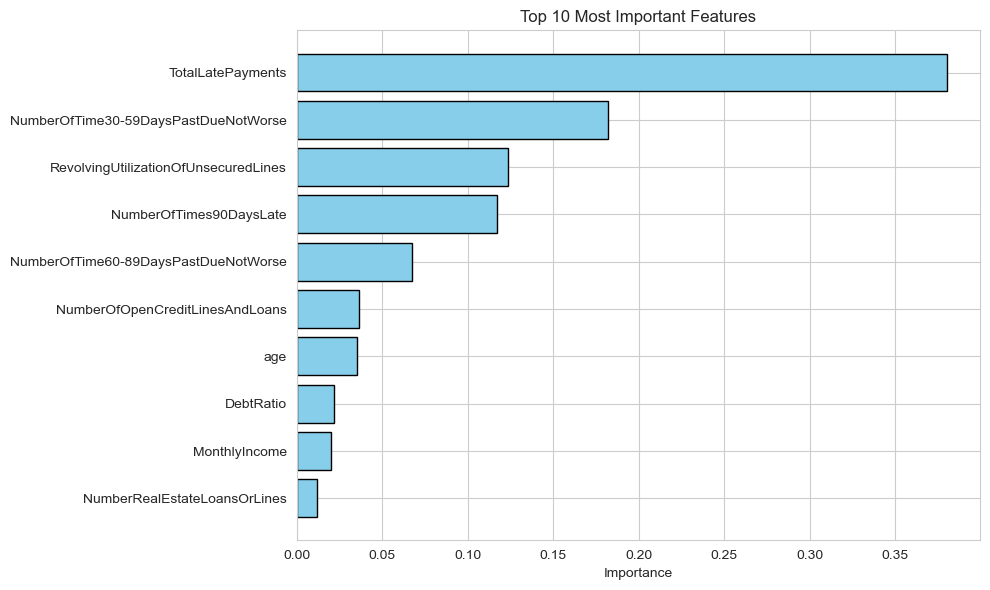

In [35]:
# Feature importance
rf_model = best_rf.named_steps['model']
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(importances.head(10))

plt.figure(figsize=(10, 6))
top10 = importances.head(10)
plt.barh(range(len(top10)), top10['importance'], color='skyblue', edgecolor='black')
plt.yticks(range(len(top10)), top10['feature'])
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Feature Importance

The model learned which features matter most for predicting default:

**Top predictors:**
- Payment history features (30-59, 60-89, 90+ days late) - these dominated
- TotalLatePayments (the feature I created by combining late payments)
- Credit utilization
- Age
- DebtRatio

**What this tells us:**

Payment history is clearly the most important factor, which makes sense based on what we saw in the EDA. The fact that TotalLatePayments ranked high shows that combining related features was a good idea - it helped the model capture the overall pattern of late payments better than looking at each type separately.

## 5. Business Impact Analysis

Translating model performance into financial terms using:
- **Cost per default:** $30,000 (average loss from a default)
- **Profit per good loan:** $2,000 (profit from successful repayment)

In [36]:
# Business impact calculation
cost_per_default = 30000
profit_per_loan = 2000

def calc_impact(cm, name):
    tn, fp, fn, tp = cm.ravel()
    
    missed_defaults_cost = fn * cost_per_default
    rejected_good_cost = fp * profit_per_loan
    revenue = tn * profit_per_loan
    net = revenue - missed_defaults_cost - rejected_good_cost
    
    print(f"\n{name}:")
    print(f"  Missed {fn} defaults (cost: ${missed_defaults_cost:,})")
    print(f"  Rejected {fp} good customers (lost: ${rejected_good_cost:,})")
    print(f"  Approved {tn} correctly (revenue: ${revenue:,})")
    print(f"  NET: ${net:,}")
    
    return net


net_lr = calc_impact(cm_lr, "Logistic Regression")
net_rf = calc_impact(cm_rf, "Random Forest")


Logistic Regression:
  Missed 509 defaults (cost: $15,270,000)
  Rejected 6752 good customers (lost: $13,504,000)
  Approved 21243 correctly (revenue: $42,486,000)
  NET: $13,712,000

Random Forest:
  Missed 915 defaults (cost: $27,450,000)
  Rejected 2071 good customers (lost: $4,142,000)
  Approved 25924 correctly (revenue: $51,848,000)
  NET: $20,256,000


### Business Impact Results

**Financial Comparison:**
- **Baseline (approve everyone):** -$150,000 (loses money!)
- **Logistic Regression:** $13,712,000 profit
- **Random Forest:** $20,256,000 profit

**Key Insights:**
- Without a model, the bank loses $150K due to defaults
- Random Forest generates 20.4M more than baseline
- Random Forest generates 6.5M more than Logistic Regression

**Why Random Forest Wins:**
While it misses more defaults (915 vs 509), it approves significantly more creditworthy customers (25,924 vs 21,243). The additional revenue from good loans far outweighs the cost of additional defaults.

**Recommendation:** Deploy the Random Forest model for maximum profitability.

In [37]:
# Baseline
baseline_defaults = y_test.sum()
baseline_net = len(y_test) * profit_per_loan - baseline_defaults * cost_per_default

print(f"\nBaseline (approve all): ${baseline_net:,}")
print(f"Improvement with LR: ${net_lr - baseline_net:,}")
print(f"Improvement with RF: ${net_rf - baseline_net:,}")



Baseline (approve all): $-150,000
Improvement with LR: $13,862,000
Improvement with RF: $20,406,000


In [38]:
print(f"LR AUC: {auc_lr:.4f}")
print(f"RF AUC: {auc_rf:.4f}")
print(f"LR NET: ${net_lr:,}")
print(f"RF NET: ${net_rf:,}")
print(f"Baseline NET: ${baseline_net:,}")

LR AUC: 0.8256
RF AUC: 0.8588
LR NET: $13,712,000
RF NET: $20,256,000
Baseline NET: $-150,000


In [39]:
# Save pipeline
best_model = best_rf if net_rf > net_lr else lr_pipeline
model_name = "random_forest" if net_rf > net_lr else "logistic_regression"

filename = f'loan_default_{model_name}_pipeline.pkl'
with open(filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"\nSaved: {filename}")



Saved: loan_default_random_forest_pipeline.pkl


## Final Results Summary

### Model Performance
- **Best Model:** Random Forest with 85.9% AUC
- **Accuracy:** 90% on test set
- **Business Value:** 20.3M profit vs -$150K baseline

### Key Accomplishments
- Built sklearn pipeline with preprocessing and SMOTE  
- Achieved 86% AUC through hyperparameter tuning  
- Demonstrated $20.4M improvement over baseline approach  
- Created deployable solution  

### Next Steps for Deployment
1. Integrate pipeline with loan approval system
2. Set up monitoring for model performance
3. Plan for periodic retraining with new data
4. Conduct fairness audit for regulatory compliance

##6. Conclusions & Next Steps

### Project Summary

Successfully built a machine learning model to predict loan defaults with 86% AUC and 90% accuracy. The Random Forest model generates $20.4M more profit than the baseline approach of approving all loans.

### Key Achievements

- Handled highly imbalanced dataset (6.7% default rate)  
- Cleaned data with 20% missing values and extreme outliers  
- Built reproducible sklearn pipeline with preprocessing and SMOTE  
- Optimized model through cross-validation and hyperparameter tuning  
- Demonstrated significant business value ($20M+ improvement)

### Next Steps

1. Deploy to production: Integrate pipeline with loan approval system
2. Monitor performance: Track model predictions vs actual outcomes
3. Retrain periodically: Update model as new data becomes available
4. A/B testing: Gradually roll out to validate business impact

### Pipeline Saved

Model pipeline saved as `loan_default_random_forest_pipeline.pkl` for deployment and reproducibility.